<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Neuropixels Extracellular Electrophysiology </h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Wednesday, August 22, 2018</h3> 

<img src="../resources/EphysObservatory/neuropixels.png" height="250" width="250"> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to Neuropixels spiking datasets. We will describe the structure of the data and then walk through basic analysis methods for accesssing, analyzing, and visualizing spike train data.</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>Datasets:</b>
<ul>
<li>extracellular action potential recordings</li>
<li>populations of single neurons in mouse brain</li>
<li>passive visual stimulation in awake mouse</li>
<li>battery of stimuli including drifting gratings and natural scenes</li>
</ul>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>Note:</b>

These pre-release datasets were collected during piloting for our new Ephys Brain Observatory. Pipeline data collection has just begun (August 2018) and production data will be released online in 2019.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>Today's Agenda:</b>
<ol>
<li>Overview of Neuropixels spiking datasets  </li>
<li>Analysis and visualization of stimulus-evoked activity</li>
<li>Correlations and cross-correlogram</li>
<li>Waveform and spike pattern analysis for cell classification</li>
<li>Project ideas</li>
</ol>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Drive path and imports</h2>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>Make sure your drive path is correct!</b>
</div>

In [1]:
# make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2018/visual_coding_neuropixels'

# Windows (a good guess)
# drive_path = 'e:/visual_coding_neuropixels'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2018/visual_coding_neuropixels'

# AWS
drive_path = '/data/dynamic-brain-workshop/visual_coding_neuropixels'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h1>1. Overview of datasets</h1>

<b>Brain areas:</b>
<ul>
    <li>Single-probe experiments: VISp</li>
    <li>Multi-probe experiments: VISp + higher visual areas (VISam, VISpm, VISrl, VISl, VISal)</li>
</ul>
    
<b>Visual stimuli:</b>
<ul>
    <li>Passive visual stimulation using Brain Observatory - Visual Coding 1.1 stimulus sets</li>
</ul>
</div>

In [3]:
# Provide path to manifest file
manifest_file = os.path.join(drive_path,'ephys_manifest.csv')

# Create a dataframe 
expt_info_df = pd.read_csv(manifest_file)

# Display information contained in the dataframe
expt_info_df

,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
0,ephys_single_14.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,ephys_single_15.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,ephys_single_16.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,ephys_single_39.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,ephys_single_51.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
5,ephys_multi_84.nwb,multi_probe,True,True,True,False,True,True,True,True,True,True,True,True,True
6,ephys_multi_58.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
7,ephys_multi_10.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
8,ephys_multi_21.nwb,multi_probe,True,False,True,True,True,False,False,True,True,True,True,True,True


In [4]:
# Make new dataframe by selecting only single-probe experiments
single_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'single_probe']

print('Number of single-probe experiments: %s') %len(single_probe_expt_info)

# Display information about single probe expts
single_probe_expt_info

Number of single-probe experiments: 5


,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
0,ephys_single_14.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,ephys_single_15.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,ephys_single_16.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,ephys_single_39.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,ephys_single_51.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.1:</b> Make a dataframe for 'multi_probe' experiments. 
</div>

In [5]:
# SOLUTION

#make new dataframe by selecting only multi-probe experiments
multi_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'multi_probe']
multi_probe_expt_info

,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
5,ephys_multi_84.nwb,multi_probe,True,True,True,False,True,True,True,True,True,True,True,True,True
6,ephys_multi_58.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
7,ephys_multi_10.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
8,ephys_multi_21.nwb,multi_probe,True,False,True,True,True,False,False,True,True,True,True,True,True


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.2:</b> How many multi-probe experiments?
</div>

In [6]:
# SOLUTION
print('Number of multi-probe experiments: %s') %len(multi_probe_expt_info)

Number of multi-probe experiments: 4


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Load dataset for one multi-probe experiment using NWB file adapter</h3>

<ul>
<li>Datasets are stored as NWB1.0 files which is based on HDF5 file format</li>
<li>To facilitate access to these files we have built a light-weight adapter object (NWB_adapter)</li>
<li>The NWB_adapter provides easy access to unit spike times and stimulus presentation metadata</li>
</ul>
</div>

In [7]:
# Import NWB_adapter
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter

/Users/michaelbu/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# Choose filename from one row from the multi_probe experiments dataframe
multi_probe_filename  = multi_probe_expt_info.iloc[1]['nwb_filename']
print multi_probe_filename

# Specify full path to the .nwb file
nwb_file = os.path.join(drive_path,multi_probe_filename)

ephys_multi_58.nwb


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We will be using the data contained in this experiment for the remainder of this notebook.

<h2>The Dataset Object</h2>
<p>We will create a data_set object for this experiment session.

<p>The data_set object contains methods and info about the data recorded in this experiment
</div>

In [9]:
data_set = NWB_adapter(nwb_file)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.3:</b> What are the attributes of the data_set object? Use either `dir` or tab-completion to find out what methods and info the `data_set` object has.
</div>

In [10]:
# SOLUTION
#data_set.  #"tab completion"

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3> probe_list and region_list</h3>

<p>Let's look at the cortical regions from which data was recorded in this experiment. For all datasets provided, each of the probes records from a unique cortical region in the order shown below.

<p> This information is contained in 'probe_list' and 'region_list' in the data_set object
</div>

In [11]:
# Probe names and corresponding cortical regions
data_set.probe_list, data_set.region_list

(['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'],
 ['VISam', 'VISpm', 'VISp', 'VISl', 'VISal', 'VISrl'])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.4:</b> Which probe has the most recorded units in this experiment? Hint: Look at number_cells attribute.
</div>

In [12]:
# SOLUTION
data_set.number_cells

{'probeA': 178,
 'probeB': 286,
 'probeC': 307,
 'probeD': 181,
 'probeE': 194,
 'probeF': 56}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> So 'number_cells' is  a dictionary that stores number of units recorded on each probe with probe names as keys.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>unit_list</h3>

<p> 'unit_list' in data_set is  a dictionary that stores unit IDs from each probe. Unit IDs in recorded on each probe can be accessed by providing a probe name as key.
</div>

In [13]:
# List of all units recorded on probeC
probeC_unit_list = data_set.unit_list['probeC']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.5:</b> Print the unit ID for the first 20 units in probeC_unit_list
</div>

In [15]:
# SOLUTION
# print unit ID for first 20 units
print(probeC_unit_list[:20]) 

['1' '2' '3' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20' '21']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b> Task 1.6:</b> How many units were recorded on probeC in this experiment?
</div>

In [16]:
# SOLUTION
len(probeC_unit_list)

307

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>unit_df</h3>
The metadata for each recorded unit is outlined in 'unit_df' as a dataframe. For each recorded unit, this dataframe contains:
<ol>
<li>the unit_id</li>
<li>the probe on which this unit was recorded</li>
<li>the brain structure</li>
<li>the signal-to-noise ratio of the spike waveform</li>
<li>the depth from the cortical surface</li>
<li>the probe channel on which it was recorded (useful for later) </li>
</ol>
</div>

In [17]:
# Look at the first five entries in the unit_df dataframe
data_set.unit_df.head()

,unit_id,probe,structure,snr,depth,channel
0,2,probeA,TH,2.80716,-3780,4
1,3,probeA,TH,2.87714,-3720,10
2,4,probeA,TH,2.05367,-3720,10
3,5,probeA,TH,2.66352,-3640,19
4,6,probeA,TH,1.58187,-3580,24


In [18]:
# List of structures from which units were recorded
np.unique(data_set.unit_df['structure'])

array(['CA', 'DG', 'SCs', 'TH', 'VISal', 'VISam', 'VISl', 'VISp', 'VISpm',
       'VISrl'], dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Spike times</h3>

<p>'spike_times' is a dictionary with probe name as keys. 
    
<p>We will look at spiketimes of units in VISp. Recall from above that these are on probeC. 
<p>To do this, we have to first isolate units on probeC that were in VISp. We will use 'unit_df' and create a dataframe that is a subset of unit_df 
</div>

In [19]:
# Specify the probe
probe_name = 'probeC'

# Speciy the region
region_name = 'VISp'

# Subset df
v1_unit_df = data_set.unit_df[data_set.unit_df['structure']==region_name]

# Display first 5 entries
v1_unit_df.head()

,unit_id,probe,structure,snr,depth,channel
667,222,probeC,VISp,4.77,-1320,250
668,223,probeC,VISp,7.01134,-1320,250
669,224,probeC,VISp,3.42435,-1300,253
670,225,probeC,VISp,3.3767,-1280,254
671,226,probeC,VISp,2.07795,-1260,256


In [20]:
# Make a list of unit_ids that are in VISp on probeC
v1_unit_list = list(v1_unit_df['unit_id'].values)

# How many units in VISp? 
print len(v1_unit_list)

71


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Extract spike_times corresponding to units on probeC.</h4>
    
<p>This returns a dictionary with unit IDs as keys. 
</div>

In [21]:
# Get all spike times from probeC units
probe_spikes = data_set.spike_times[probe_name]

# Look at the first 5 unit IDs in probe_spikes
print probe_spikes.keys()[:5]

['216', '217', '214', '215', '212']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<b>Get spike times from single unit in VISp</b>

<p> We will do this by specifying a unit of interest in 'v1_unit_list' and providing that as a key to 'probe_spikes'
</div>

In [22]:
unit_of_interest = v1_unit_list[3]        # Specify unit of interest

spikes = probe_spikes[unit_of_interest]   # Obtain spike times of this unit

spikes[:20]                               # List the first 20 spiketimes of this unit

array([10.66296688, 13.18336709, 14.18053384, 17.16516742, 18.61320088,
       19.35220094, 21.80556781, 22.38693453, 29.00896841, 29.17666843,
       29.40403511, 30.9078019 , 35.37656895, 35.84590232, 38.16466918,
       38.87430257, 40.4246027 , 40.75716939, 41.1965361 , 42.04250284])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 1.7:</b> How many spikes were recorded from our 'unit_of_interest'?
</div>

In [23]:
# SOLUTION
len(spikes)

60333

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 1.1:</b> Plot a histogram showing spike count across the population of units recorded in VISp. 

<ol>
    <li>Create an empty list called 'num_spikes'.</li>
    <li>Loop through all units in 'v1_unit_list' and append the number of spikes for each unit to 'num_spikes'. Make sure to use 'probe_spikes' and pass unit_id as a key when you loop through.</li>
    <li>Use plt.hist to plot the histogram. You can specify 'bins=20' in plt.hist</li>
</ol>
</div>

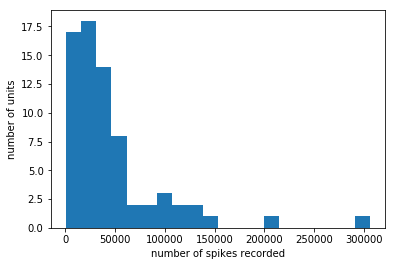

In [24]:
# SOLUTION
num_spikes = []

for unit in v1_unit_list:
    sp = probe_spikes[unit]     
    num_spikes.append(len(sp)) 

#Plot figure
plt.figure()
plt.hist(num_spikes,bins=20)
plt.ylabel('number of units')
plt.xlabel('number of spikes recorded')
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Raster plot of spike times over some time interval in session</h3>

<p>We have isolated spike times from a unit in VISp and stored it in 'spikes'. We can visualize them using a raster plot.
</div>

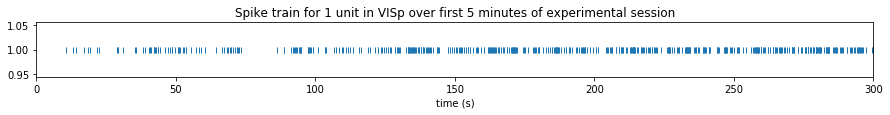

In [25]:
# Make raster plot of single unit spike trains within a specified time window

tst = 0  #start time in sec
tend = 300 #end time in sec

#Plot figure
fig,ax = plt.subplots(1,1,figsize=(15,1))
ax.plot(spikes,np.ones_like(spikes),'|')
ax.set_xlim(tst,tend)

ax.set_xlabel('time (s)')
ax.set_title('Spike train for 1 unit in VISp over first 5 minutes of experimental session')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 1.2</b>  Plot raster of spike train in 'spikes' from 10 mins to 15 mins.
</div>

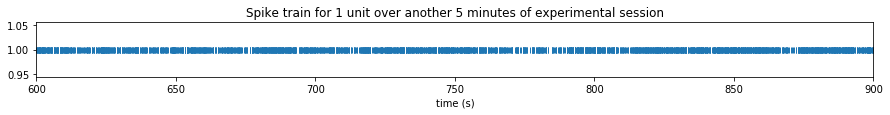

In [26]:
# SOLUTION
tst = 600  #start time in sec
tend = 900 #end time in sec

#Plot figure
fig,ax = plt.subplots(1,1,figsize=(15,1))
ax.plot(spikes,np.ones_like(spikes),'|')
ax.set_xlim(tst,tend)

ax.set_xlabel('time (s)')
ax.set_title('Spike train for 1 unit over another 5 minutes of experimental session')
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot spike times from all VISp neurons for the first five minutes</h4>

<p> We will do this by creating a figure object and plotting rasters by looping through all units in VISp
</div>

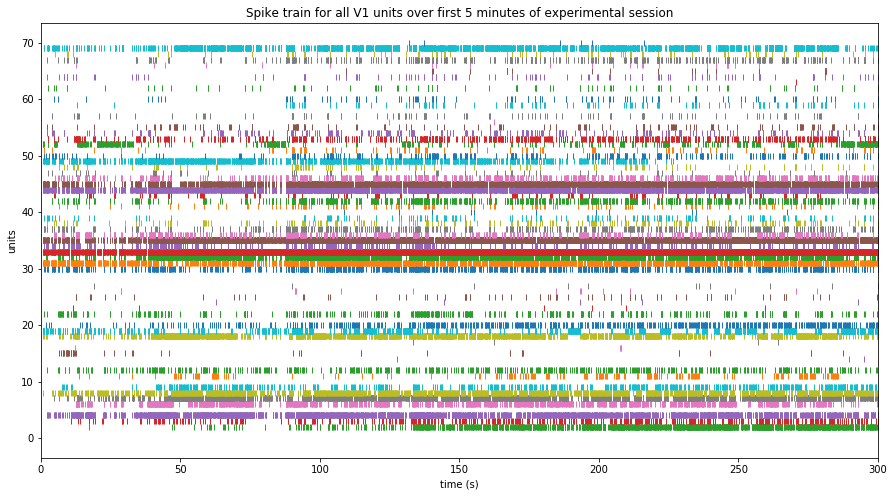

In [27]:
tst = 0
tend = 300

# Figure setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

# Loop through list of spike times from each unit and plot at different y-values
for i,unit in enumerate(v1_unit_list):
    spike_times = probe_spikes[unit]
    ax.plot(spike_times,i*np.ones_like(spike_times),'|')

#Annotate plot
plt.xlim(tst,tend)

ax.set_ylabel('units')
ax.set_xlabel('time (s)')
ax.set_title('Spike train for all V1 units over first 5 minutes of experimental session')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 1.3:</b> Make a series of rasters plots showing spiking activity from 20 units recorded from each of the 6 visual cortical areas. To do this,

<ol>
    <li>Loop over probes--extract all spikes from probe within this loop.</li>
    <li>Use function below (**get_units_in_visual_cortex()** ) to return only visual cortical neurons.</li>
    <li>Loop over 20 units in each area--extract unit spike times from probe_spikes and plot raster.</li>
</ol>

<b>HINT:</b> Recall from above that each probe corresponds to a unique visual cortical region. To loop over probes and get the corresponding region for 'get_units_in_visual_cortex', use the <b>zip</b> function in python.
</div>

In [28]:
def get_units_in_visual_cortex(cortical_region_name, data_set):
    '''Inputs:
            cortical_region_name: the name of visual cortical region ('VISp','VISl','VISal','VISrl','VISam','VISpm')
            data_set: data_set object for one ephys experiment
       Returns:
            vis_unit_list: list of unit_IDs in the cortical region '''
    
    # Select dataframe subset of units in cortical region
    subset_unit_df = data_set.unit_df[data_set.unit_df['structure']==cortical_region_name]
    
    # Make a list of unit_ids that are in visual cortical region on specified probe
    vis_unit_list = list(subset_unit_df['unit_id'].values)
    
    return vis_unit_list

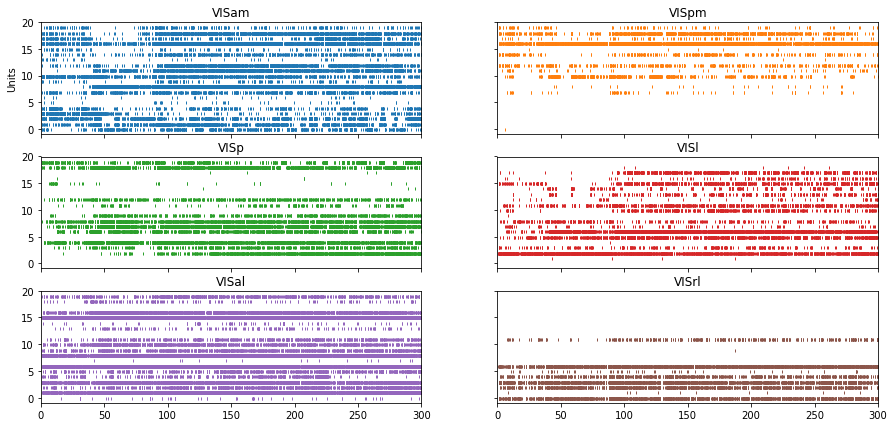

In [29]:
#SOLUTION
# Raster plot showing 20 units simultaneously recorded in each of 6 areas

#Get probes and regions in data_set
probes = data_set.probe_list
regions = data_set.region_list

# Figure setup
fig,ax = plt.subplots(3,2,figsize=(15,7),sharex=True,sharey=True)

#The ravel command gets the six axes (3*2) into a single list.
ax = ax.ravel()     

#List of colors so that a unique color can be used for each plot. 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Loop over probes. Use a counter variable 'idx' that increments by 1 for every probe
idx = 0
for probe,region in zip(probes,regions):
    probe_spt = data_set.spike_times[probe]                     # Get all spikes from probe
    vis_unit_list = get_units_in_visual_cortex(region,data_set) # Get units in one visual cortical region
    
    # Plot spike times for 20 units
    for i,unit in enumerate(vis_unit_list[:20]):
        spike_times =  probe_spt[unit]                       #Extract spike times for each unit from probe spiketimes
        ax[idx].plot(spike_times,i*np.ones_like(spike_times),'|',color=colors[idx],markersize=3) #fill in the first two entries here
        ax[idx].set_title(region)                           #Use region name as title for each subplot 
    
    idx = idx+1
        
plt.xlim(0,300)
ax[0].set_ylabel('Units')
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>2. Visualization and analysis of stimulus-evoked activity</h1>

<p> We will now look at analyses of stimulus-evoked activity for a few stimuli.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Example units</h4>

<p> For the multi-probe experiments, the data_set object contains a dictionary of example units. We will use these to illustrate stimulus-evoked activity. <p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 2.1:</b> What are the keys of the example_units dictionary?
</div>

In [30]:
# SOLUTION
data_set.example_units.keys()

['probe', 'unit_ids', 'structure']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We will store the information from 'example_units' in several variables for ease of use below.
</div>

In [31]:
ex_probe = data_set.example_units['probe']        #example probe
ex_unit_ids = data_set.example_units['unit_ids']   #example unit_ids
ex_structure = data_set.example_units['structure']  #example_structure

print(ex_probe, ex_unit_ids, ex_structure)

('probeC', ['248', '294', '242', '278', '241', '266'], 'VISp')


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Stimulus table</h3>
<ul>
    <li>Stimulus presentation information is found in the stimulus table</li>
    <li>The stim table for each stimulus type is accessed via stim_tables dictionary</li>
    <li>The keys of stim_tables are names of the stimulus sets</li>
</ul>
</div>

In [32]:
#What are the keys of stim_tables?
data_set.stim_tables.keys()

['natural_movie_1',
 'natural_movie_3',
 'flash_250ms',
 'drifting_gratings',
 u'gabor_20_deg_250ms',
 u'spontaneous',
 'static_gratings',
 'natural_scenes']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 2.2:</b> Get the stimulus table for natural scenes.
</div>

In [33]:
#SOLUTION

# Get the stim table for natural scenes
ns_table = data_set.stim_tables['natural_scenes']

In [34]:
ns_table.head()

,start,end,frame
0,5908.72592,5908.97449,34.0
1,5908.97449,5909.22469,6.0
2,5909.22469,5909.47521,28.0
3,5909.47521,5909.72637,109.0
4,5909.72637,5909.97549,105.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
The above table shows the start and end time of presentation of each natural scene stimulus. Each scene has a unique image ID given by the 'frame' column 
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 2.3:</b> How many presentations of image 46 are there in this experiment?
</div>

In [35]:
# SOLUTION
print(len(ns_table[ns_table.frame==46]))

50


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Trial-wise raster plot</h3>
<ul>
    <li>We'll now use the stim table to identify when image #46 was presented</li>
    <li>From this we'll extract spikes around each presentation of image #46</li>
    <li>Finally we'll make a raster plot showing spikes on each trial</li>
</ul>
</div>

In [36]:
# Select trials from stim table for specific image_id
image_id = 46
ns_table_subset = ns_table[ns_table.frame==image_id] # This is the stim table for image 46
ns_table_subset.head(3) 

,start,end,frame
326,5990.29287,5990.54277,46.0
540,6043.85469,6044.10378,46.0
579,6053.61356,6053.86333,46.0


In [37]:
# Select spikes times from example probe
ex_probe_spikes = data_set.spike_times[ex_probe]

In [38]:
#Get spikes for all repeats of image 46 for ONE example unit on our example probe

# Time before and after image presention
pre_time = 1.
post_time = 1.

# Get spike times from first unit in example list
unit_spikes = ex_probe_spikes[ex_unit_ids[0]]

# Make list that will contain spike train for each image presentation
all_trials_spikes = []

#Loop through every presentation of image 46
for i,start in enumerate(ns_table_subset.start):
    
    # Extract spikes around stimulus Start time
    spikes_each_trial = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes <= start+post_time)]
    
    #Subtract start time of stimulus presentation
    spikes_each_trial = spikes_each_trial - start
    
    #Add list of spikes to main list
    all_trials_spikes.append(list(spikes_each_trial))

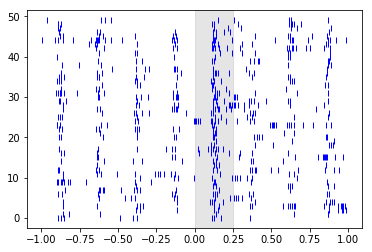

In [39]:
#Plot raster for given unit in VISal for image 46

# Figure setup
fig,ax = plt.subplots(1,1,figsize=(6,4))

# Make raster plot
for i,tr_spikes in enumerate(all_trials_spikes):
    ax.plot(tr_spikes,i*np.ones_like(tr_spikes),'|',color='b')
    ax.invert_yaxis()

# Stimulus presentation window
stimulus_duration = ns_table_subset.end.values[0] - ns_table_subset.start.values[0]
ax.axvspan(0,stimulus_duration,color='gray',alpha=0.2);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2.1:</b> Write a function to plot raster for a given unit and image. Use your function to plot rasters for the 6 example units for image 46. Your function should have the following signature:

<pre><code>
def image_raster(img, unit_spikes, ax):
    #your code here
    return ax
</code></pre>

where: 
<ul>
    <li>img: the stim table for 1 image</li>
    <li>unit_spikes: the spike times for 1 unit</li>
    <li>ax: the handle of a matplotlib axes object (the modified handle is also the return value)</li>
</ul>
</div>

In [40]:
# SOLUTION
def image_raster(img,unit_spikes,ax=[]):
    
    #Default params
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    pre_time = .5
    post_time = .75

    all_trials = []
    # Get spike train for each trial and append to all_trials
    for i,start in enumerate(img.start):
        spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Plot raster for each trial
    for i,spikes in enumerate(all_trials):
        ax.plot(spikes,i*np.ones_like(spikes),'|',color='b',markersize=4)
        ax.invert_yaxis()  
    
    ax.axvspan(0,0.25,color='gray',alpha=0.2);
    return ax

In [41]:
# Reminder: we stored info of example units in these variables:
print(ex_probe, ex_unit_ids, ex_structure)

('probeC', ['248', '294', '242', '278', '241', '266'], 'VISp')


In [42]:
# Get spikes on example probe
ex_probe_spikes = data_set.spike_times[ex_probe]

# Get stim table for natural scene = 46
image_id = 46
img = ns_table[ns_table.frame==image_id]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2.1 (contd.):</b> Plot rasters for the above 6 example units for image 46 using your function. 
</div>

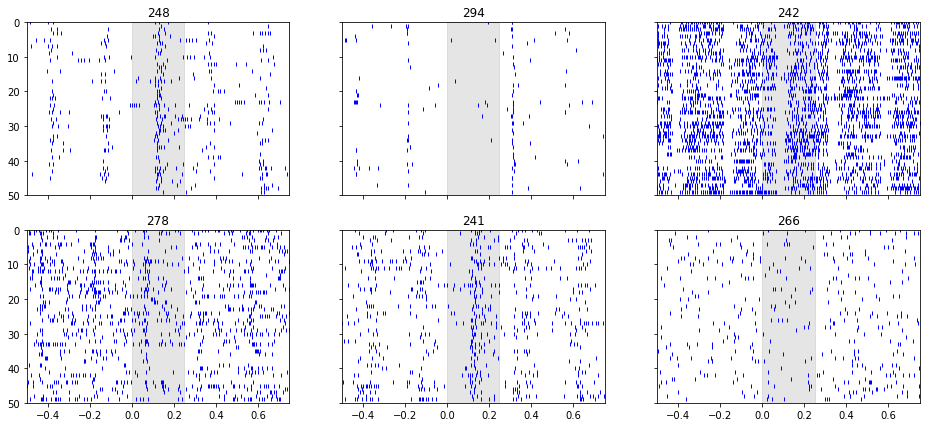

In [43]:
# Figure setup
fig,ax = plt.subplots(2,3,figsize=(16,7),sharex=True,sharey=True)
ax = ax.ravel()

#Loop through example units
for i,unit in enumerate(ex_unit_ids):
    unit_spikes = ex_probe_spikes[unit] #spikes for each example unit
    image_raster(img,unit_spikes,ax[i])  #raster plot returned by your function
    ax[i].set_title(unit)                 #set plot title
    
ax[0].set_xlim(-0.5,0.75)
ax[0].set_ylim(50,0)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Peri-stimulus time histogram (PSTH)</h3>

The PSTH is used to visualize the firing rate of a neuron over time relative to a stimulus presentation event. The firing rate is computed by counting the number of spikes in a given time-window and dividing by the window-size.
</div>

In [44]:
#Get spikes for all repeats of image 46 for a single unit in VISal 

# Get spikes for example unit
unit = ex_unit_ids[0]
unit_spikes = ex_probe_spikes[unit]

# Make a list with spike train for each stimulus presentation trial
all_trials_spikes = []

#Loop through all repeats. 
for i,start in enumerate(ns_table_subset.start):
    trial_spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
    trial_spikes = trial_spikes - start
    all_trials_spikes.append(list(trial_spikes))

In [45]:
# Make PSTH for each trial with 10 ms bins

# Time before and after image presention
pre_time = 1.
post_time = 1.

bin_width = 0.01                 #time-window-size to bin spikes
bins = np.arange(-pre_time,post_time+bin_width,bin_width)   # time bins

fr_per_trial = []                 #empty list to store firing rates per trial

#Loop through all trials
for trial_spikes in all_trials_spikes:
    counts,edges = np.histogram(trial_spikes,bins)      #
    counts = counts/bin_width#np.diff(bins[0:2])
    fr_per_trial.append(counts)

centers = edges[:-1] + np.diff(bins)/2  #bin centers

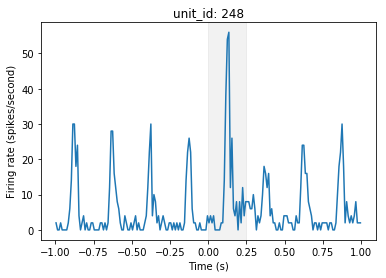

In [46]:
#Calculate mean firing rate across all trials
mean_fr = np.mean(fr_per_trial,axis=0)

# Plot mean PSTH across trials
fig,ax = plt.subplots(1,1)
ax.plot(centers,mean_fr)
ax.axvspan(0,0.25,color='gray',alpha=0.1)
ax.set_ylabel('Firing rate (spikes/second)')
ax.set_xlabel('Time (s)')
ax.set_title('unit_id: ' + unit)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2.2:</b> Write a function to plot PSTH for a given unit and image. Use your function to plot PSTHs for 6 example units for image 46. Use a bin_width of 5 ms to bin spikes. Your function should have the following signature:

<pre><code>
def image_psth(img, unit_spikes, ax):
    #your code here
    return ax
</code></pre>

where: 
<ul>
    <li>img: the stim table for 1 image</li>
    <li>unit_spikes: the spike times for 1 unit</li>
    <li>ax: the handle of a matplotlib axes object (the modified handle is also the return value)</li>
</ul>
</div>

In [47]:
# SOLUTION
def image_psth(img,unit_spikes,ax=[]):
    
    #Default params
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    pre_time = 1.#.5
    post_time = 1.#.75

    all_trials = []
    # Get spike train for each trial
    for i,start in enumerate(img.start):
        spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Make PSTH for each trial with 5 ms bins
    bin_width = 0.005
    bins = np.arange(-pre_time,post_time+bin_width,bin_width)   
    all_counts = []
    for trial in all_trials:
        c,edges = np.histogram(trial,bins)
        c = c/bin_width#np.diff(bins[0:2])
        all_counts.append(c)
    centers = edges[:-1] + np.diff(bins)/2
    
    # Plot mean PSTH across trials
    ax.plot(centers,np.mean(all_counts,axis=0))
    ax.axvspan(0,0.25,color='gray',alpha=0.1)
    ax.set_ylabel('Firing rate (spikes/second)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim(pre_time,post_time)

    return ax

/Users/michaelbu/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


(-0.5, 0.75)

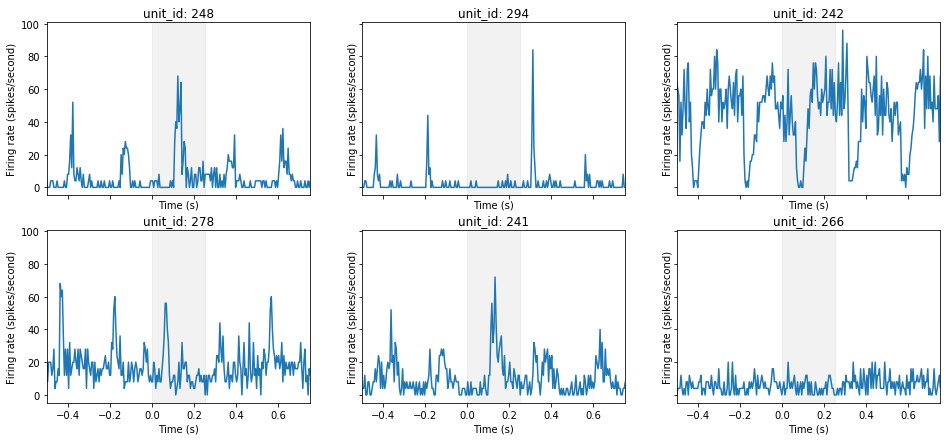

In [48]:
# Figure setup
fig,ax = plt.subplots(2,3,figsize=(16,7),sharex=True,sharey=True)
ax = ax.ravel()

for i,unit in enumerate(ex_unit_ids):
    unit_spikes = ex_probe_spikes[unit]
    image_psth(img,unit_spikes,ax[i])
    ax[i].set_title('unit_id: ' + unit)
    
ax[0].set_xlim(-0.5,0.75)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Mean sweep response and tuning curves</h3>

<p> We plotted rasters and mean firing rates in response to a natural scene. 
<p>We will next see how to use the mean responses across different sweeps/trials of drifting gratings to calculate **orientation tuning curves** of single neurons 
<p> The orientation tuning curve is calculated from the mean responses for different orientations of drifting gratings a fixed spatial and temporal frequency.
</div>

In [49]:
# Get drifting gratings stim table
dg_stim_full = data_set.stim_tables['drifting_gratings']
dg_stim_full.head()

,start,end,temporal_frequency,spatial_frequency,orientation
0,1591.12067,1593.12137,2.0,0.04,315.0
1,1594.12319,1596.12395,4.0,0.04,135.0
2,1597.12589,1599.12625,15.0,0.04,225.0
3,1600.12868,1602.12863,4.0,0.04,270.0
4,1603.13079,1605.13106,4.0,0.04,90.0


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 2.4</b>  Make a variable stim_table_ori_90 from dg_stim_full after selecting for orientation = 90. What are the unique temporal frequencies?
</div>

In [50]:
# SOLUTION
stim_table_ori_90 = dg_stim_full[dg_stim_full.orientation==90.]
unique_TFs = np.unique(stim_table_ori_90.temporal_frequency)
print unique_TFs

[ 1.  2.  4.  8. 15.]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We'll now make an orientation tuning curve for an example unit using only TF = 4.0 Hz
</div>

In [51]:
# First Make stimulus table for drifting gratings with TF = 4.0
dg_stim = dg_stim_full[(dg_stim_full.temporal_frequency==4.0)]

# Get list of unique stimulus orientations
oris = sorted(dg_stim.orientation.unique())

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We will calculate the mean and sem (standard error of mean) of the firing rates for every trial with a given orientation. We will store the results in a dictionary called <b>mean_sweep_response</b>. 
</div>

In [52]:
# Calculate mean response over all orientations

# Example unit
unit_spikes = ex_probe_spikes[ex_unit_ids[0]]

## Dictionary to store trial responses
#trial_response = {}

# Window to compute firing rate
window_size = 0.25

# Dictionary to hold results
mean_sweep_response = {'Ori':[],'fr_mean':[],'fr_sem':[]}

# Loop over orientations
for ori in oris:
    
    tmp = dg_stim[dg_stim.orientation==ori]   #subset stim table for fixed ori
    fr = []                                  #empty list to store firing rates
    
    # Loop over trials/sweeps
    for i,start in enumerate(tmp.start):
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window_size)]   #collect spikes in window
        fr.append(len(spikes)/window_size)    #count total number of spikes in window and divide by window size
    
    mean_sweep_response['Ori'].append(ori)
    mean_sweep_response['fr_mean'].append(np.mean(fr))           #Mean firing rate over time = window_size
    mean_sweep_response['fr_sem'].append(np.std(fr)/np.sqrt(len(fr)))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<b>plt.errorbar(x,y,yerr)</b> allows you to plot y vs x along with the standard deviation (sem) at every point.
</div>

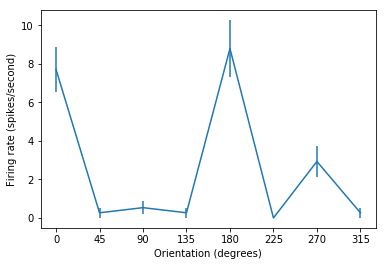

In [53]:
# Plot tuning curve
plt.errorbar(x=mean_sweep_response['Ori'],y=mean_sweep_response['fr_mean'],yerr=mean_sweep_response['fr_sem'])
plt.xticks(oris)
plt.ylabel('Firing rate (spikes/second)')
plt.xlabel('Orientation (degrees)')
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The tuning curve above shows that our chosen unit is selective for **horizontal** drifting gratings. 
<p>We can perform a similar analysis for static gratings and check if the results hold. 
<p>In the interest of time, we leave that for **homework**. Please come talk to us regarding solutions
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Homework 2.1</b> Compute tuning curve for static gratings. 
</div>

In [54]:
# SOLUTION - Talk to Ram and Shawn

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Homework 2.2</b>  Plot rasters for each orientation of static and drifting gratings to compare temporal dynamics.
</div>

In [55]:
# SOLUTION - talk to Ram and Shawn

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>3. Correlations and cross-correlogram</h1>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Correlation between two neurons</h3>

<p> Next, we consider correlated activity between neurons at different timescales by computing signal and noise correlations and pairwise cross-correlograms
<p> We start with signal correlations for drifting gratings
</div>

In [56]:
# Get stimulus table 
dg = data_set.stim_tables['drifting_gratings']

# Select TF = 4.0
dg_stim = dg[(dg.temporal_frequency==4.0)]

# Get orientation conditions
oris = sorted(dg_stim.orientation.unique())

# Get number of trials
n_trials_dg = 15

In [57]:
# Visualize dataframe
dg_stim.loc[dg_stim.orientation.values==oris[0]]

,start,end,temporal_frequency,spatial_frequency,orientation
14,1633.15613,1635.15480,4.0,0.04,0.0
125,1966.43670,1968.43496,4.0,0.04,0.0
194,2173.60734,2175.60735,4.0,0.04,0.0
213,3221.48529,3223.48317,4.0,0.04,0.0
222,3248.50479,3250.50560,4.0,0.04,0.0
237,3293.54236,3295.54306,4.0,0.04,0.0
271,3395.62802,3397.62850,4.0,0.04,0.0
278,3416.64722,3418.64555,4.0,0.04,0.0
295,3467.68839,3469.68816,4.0,0.04,0.0
324,3554.76080,3556.76128,4.0,0.04,0.0


In [58]:
# Example units
ex_probe_spikes = data_set.spike_times[ex_probe]
units = ex_unit_ids[:2]#[ex_unit_ids[0],ex_unit_ids[4]]#

# Time window to compute firing rate
window = 0.25

# Define mean response matrix with dimension: neuron*ori*trial
dg_response = np.zeros([len(units), len(oris), n_trials_dg])

# Loop over units
for idx_u, unit in enumerate(units):
    unit_spikes = ex_probe_spikes[unit]
    
    # Loop over orientations
    for idx_o, ori in enumerate(oris):
        tmp = dg_stim[dg_stim.orientation==ori]
        
        # Loop over trials/sweeps
        for idx, start in enumerate(tmp.start):
            dg_tr_spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
            
            # Calculate firing rate spike/sec
            FR = len(dg_tr_spikes)/window
            dg_response[idx_u, idx_o, idx]=FR

In [59]:
# Check shape of output
dg_response.shape

(2, 8, 15)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Signal correlation: correlation among tuning curves</h3>

<p> The signal correlation measures the correlation coefficient between mean responses to different stimuli. For drifting gratings with fixed SF and TF, it tells us how similar/dissimilar the orientation tuning of the two neurons is.
<p> We first plot the orientation tuning curves for the two neurons and then calculate the signal correlation
</div>

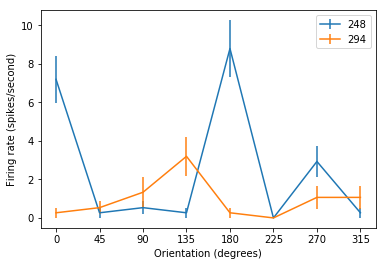

In [60]:
resp0 = dg_response[0,:,:]          #response of neuron 1 for all oris*trials
mean_fr_0 = resp0.mean(1)        #mean FR across all 15 trials
sem_fr_0 = resp0.std(1)/np.sqrt(n_trials_dg)    #sem across all 15 trials

resp1 = dg_response[1,:,:]          #response of neuron 2 for all oris*trials
mean_fr_1 = resp1.mean(1)        #mean FR across all 15 trials
sem_fr_1 = resp1.std(1)/np.sqrt(n_trials_dg)    #sem across all 15 trials

plt.figure()
plt.errorbar(x=oris,y=mean_fr_0,yerr=sem_fr_0, label=units[0])
plt.errorbar(x=oris,y=mean_fr_1,yerr=sem_fr_1, label=units[1])
plt.xticks(oris)
plt.ylabel('Firing rate (spikes/second)')
plt.xlabel('Orientation (degrees)')
plt.legend()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Its evident that the two tuning curves are not very similar. This can be seen by computing the signal correlation.
<p> Correlation between two lists of numbers can be calculated by first calculating the correlation matrix using **numpy.corrcoef** and looking at the off_diagonal element of the 2 x 2 matrix. 
</div>

In [61]:
signal_corr = np.corrcoef(dg_response.mean(2))[0,1]
print(signal_corr)

-0.4063753731503961


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Noise correlation: correlation across trials</h3>

Noise correlation is the correlation coefficient of spike count responses to repeated presentations of identical stimuli, under the same behavioral conditions

<p>Noise correlation estimates are better with more trials so we'll use the natural scenes (n=50 trials) to show an example noise correlation calculation. 
<p>Here we'll compute the noise correlation for image 46 that we examined earlier.
</div>

In [62]:
# Example units
ex_probe_spikes = data_set.spike_times[ex_probe]
units = ex_unit_ids[:2]

# Image 46 stim table
image_id = 46
img_stim = ns_table[ns_table.frame==image_id]
n_trials_ns = len(img_stim)

# Define mean response matrix with dimension: neuron*trial
ns_response = np.zeros([len(units), n_trials_ns])

window = 0.5  #(WHY? CHECK WITH SHAWN)

# Loop over units
for idx_u, unit in enumerate(units):
    unit_spikes = ex_probe_spikes[unit]

    # Loop over trials/sweeps
    for idx, start in enumerate(img_stim.start):
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes <= start+window)]
        # Calculate firing rate spike/sec
        FR = len(spikes)/window
        ns_response[idx_u, idx]=FR

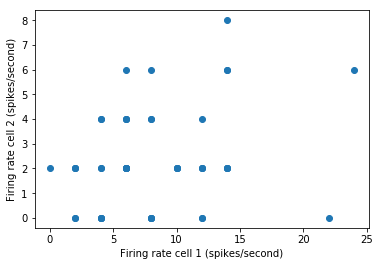

In [63]:
fig,ax = plt.subplots(1,1)
ax.plot(ns_response[0,:],ns_response[1,:],'o')
plt.ylabel('Firing rate cell 2 (spikes/second)')
plt.xlabel('Firing rate cell 1 (spikes/second)')
plt.show()

In [64]:
noise_corr = np.corrcoef(ns_response[0,:],ns_response[1,:])[0,1]
print(noise_corr)

0.2610897170012992


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Homework 3.1</b> Compute signal and noise correlation across all drifting grating stimulus parameters and compute average noise correlation. Compare this to signal and noise correlation across all natural scene stimuli.
</div>

In [65]:
# SOLUTION - Talk to Ram and Shawn

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Cross-correlogram: fast timescale correlations</h3>

The cross-correlogram provides a measure of correlations between neurons on a much faster timescale (typically within ~5 ms). We provide a function <b>ccg</b> below that can be used to compute cross-correlograms between pairs of neurons. 
</div>

In [66]:
# Cross-correlogram (CCG)

def ccg(train1, train2, binrange, binsize):
    """
    Computes a cross-correlogram for two spike trains.

    Parameters
    ----------
    train1 : numpy array
        Primary spike train. Cross-correlogram will be computed relative to spikes in this spike train.
    train2 : numpy array
        Secondary spike train.
    binrange : tuple or list of length=2
        Window over which to compute cross correlogram.
    binsize : float
        Size of bins in cross-correlogram

    """
    
    nbins = int((binrange[1]-binrange[0])/binsize)
    
    diffs = [extract_local(train2,t1,binrange) for t1 in train1]
        
    diffs = np.hstack(diffs)
    diffs = diffs[diffs!=0]

    hist, edges = np.histogram(diffs, bins=nbins, range=binrange)
        
    return edges[1:]-binsize/2, hist /float(len(train1))*100

def extract_local(train2,t1,binrange):
    """
    Returns events in `train2` which are within `binrange` of `t1`, aligned to `t1`

    Parameters
    ----------
    train2 : numpy array
    t1 : float
    binrange : tuple or list of length=2

    """

    start = np.searchsorted(train2,t1 + binrange[0])
    end = np.searchsorted(train2,t1 + binrange[1])

    return train2[start:end] - t1

In [67]:
spt_0 = ex_probe_spikes[ex_unit_ids[0]]
spt_1 = ex_probe_spikes[ex_unit_ids[4]]

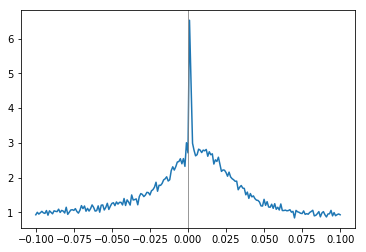

In [68]:
# Plot cross-correlogram between spike trains recorded from the two units

binsize = 0.001
ccg_win = [-0.1005,0.1005] #np.arange(-0.1005,0.1005,binsize)
ccg_centers,ccg_vals = ccg(spt_0,spt_1,ccg_win,binsize)

#Plot ccg
plt.figure()
plt.plot(ccg_centers,ccg_vals)
ax = plt.gca()
ax.axvline(ccg_centers[100],color='gray',linewidth = 0.8)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Homework 3.2:</b> Write function to compute the "shuffle corrected CCG". 
</div>

In [69]:
# SOLUTION - Talk to Ram and Shawn


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h1>4. Waveform and spike train analysis for cell classification</h1>

<ul>
    <li>Different cell types can show distinct extracellular action potential waveforms and firing patterns</li>
    <li>Here we will plot spike waveforms and inter-spike interval distributions for units in this experiment</li>
    <li>We will start by illustrating the classic RS and FS units division</li>
</ul>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3>Spike waveforms: regular spiking (RS) and fast spiking (FS) units</h3>
</div>

In [70]:
# Get spikes waveforms using method on data_set
spike_waveforms = data_set.get_waveforms()

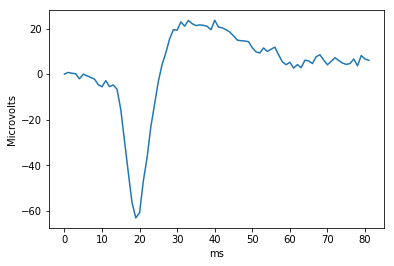

In [71]:
# Plot spike waveform for one unit
wv = spike_waveforms[ex_probe][ex_unit_ids[0]]
plt.plot(wv)
plt.ylabel('Microvolts')
plt.xlabel('ms')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 4.1:</b> Compute spike duration for all units in this experiment and plot histogram of values.
Hints:
<ol>
    <li>Concatenate waveforms in a matrix</li>
    <li>Compute location of trough and peak using np.argmax() and np.argmin()</li>
    <li>Compute difference between time of trough and peak</li>
    <li>Plot histogram of spikes duration (time between trough and peak)</li>
</ol>
</div>

In [72]:
# Concatenate waveforms into matrix
wv = []
for k,w in spike_waveforms.iteritems():
    for kk,ww in w.iteritems():
        wv.append(ww)  
wv = np.array(wv)

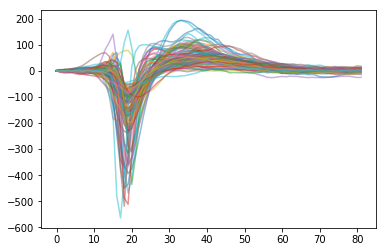

In [73]:
# Plot 100 waveforms in this data_set
fig,ax = plt.subplots(1,1,figsize=(6,4))
for w in wv[:100]:
    ax.plot(w,alpha=0.5)

In [74]:
# Compute trough-to-peak duration
duration = np.argmax(wv,axis=1) - np.argmin(wv,axis=1)
duration = 1/30000.*duration*1000 # Convert samples to ms

Text(0.5,0,'Spike duration (ms)')

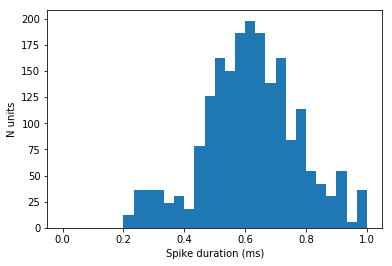

In [75]:
# Plot histogram of duration
plt.hist(duration,bins=30,range=(0,1));
plt.ylabel('N units')
plt.xlabel('Spike duration (ms)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Inter-spike interval (ISI) distributions and bursting</h3>
The inter-spike interval histogram shows the timing between spikes from single neuron. This histogram can show key features of firing including the refractory period, bursting, and oscillations.
</div>

In [76]:
# Example units
ex_probe_spikes = data_set.spike_times[ex_probe]
unit_spikes = ex_probe_spikes[ex_unit_ids[3]]

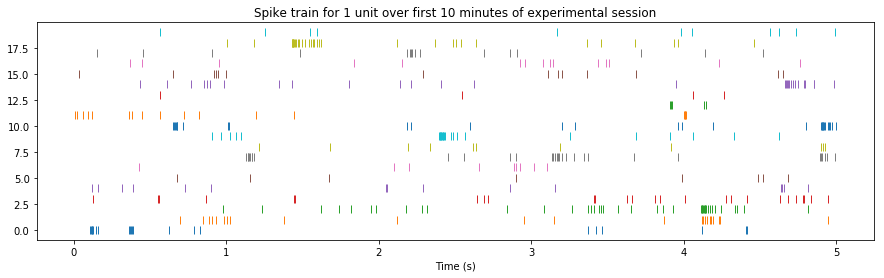

In [77]:
# Make raster plot of single unit spike train for first 600 seconds of recording
fig,ax = plt.subplots(1,1,figsize=(15,4))

t = (300,400)
window_length = 5 # 5 seconds
t = np.arange(t[0],t[1],window_length)

# Plot 5 second chunks from unit
for i,start in enumerate(t):
    spk = unit_spikes[(unit_spikes>start) & (unit_spikes<=start+window_length)]
    spk = spk - start
    ax.plot(spk,i*np.ones_like(spk),'|',markersize=8)

ax.set_xlabel('Time (s)')
ax.set_title('Spike train for 1 unit over first 10 minutes of experimental session')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Task 4.1:</b> Plot the inter-spike interval distribution with 1 ms bins. Show 2 graphs with different x-limits: (0, 20 ms) and (0, 200 ms). 
Hint: use the function np.diff to compute the difference between adjacent spike times (i.e. the inter-spike interval).
</div>

In [78]:
#SOLUTION
# Compute inter-spike interval distribution for 1 unit
isi = np.diff(unit_spikes)
isi = isi*1000 # convert to ms
print(isi[:20])

[  18.3666682   190.80001595   41.23333678 1979.60016549   59.96667168
   61.90000517 1374.63344825 3364.20028124 2527.03354459   12.50000104
   19.86666833  351.90002942   32.60000273  138.40001157   38.73333657
   45.33333712   67.10000561   20.7666684    33.30000278   57.13333811]


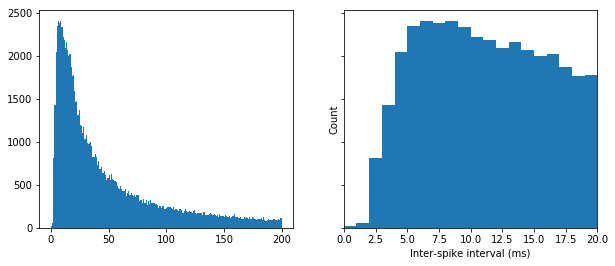

In [79]:
# Plot ISI distribution as histogram with 1 ms bins
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
ax[0].hist(isi,bins=200,range=(0,200))
ax[1].hist(isi,bins=200,range=(0,200))
ax[1].set_xlim(0,20)
plt.ylabel('Count')
plt.xlabel('Inter-spike interval (ms)')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 4.3:</b>
<ol>
    <li>Get spike times for 50 units with highest SNR and at least 3000 total spikes.</li>
    <li>Plot ISI distribution for each unit</li>
    <li>Do the ISI distributions vary between cells?</li>
</ol>
</div>

In [80]:
# Get unit_df with metadata including snr
snr_df = data_set.unit_df[data_set.unit_df.structure == 'VISp']
snr_df.head()

,unit_id,probe,structure,snr,depth,channel
667,222,probeC,VISp,4.77,-1320,250
668,223,probeC,VISp,7.01134,-1320,250
669,224,probeC,VISp,3.42435,-1300,253
670,225,probeC,VISp,3.3767,-1280,254
671,226,probeC,VISp,2.07795,-1260,256


In [81]:
# Sort df by highest snr values
snr_df_2 = snr_df.sort_values(by=['snr'], ascending=False)
snr_df_2.head()

,unit_id,probe,structure,snr,depth,channel
689,245,probeC,VISp,7.16157,-1160,266
668,223,probeC,VISp,7.01134,-1320,250
729,293,probeC,VISp,6.4157,-800,302
696,252,probeC,VISp,6.08229,-1040,278
713,270,probeC,VISp,5.79568,-940,289


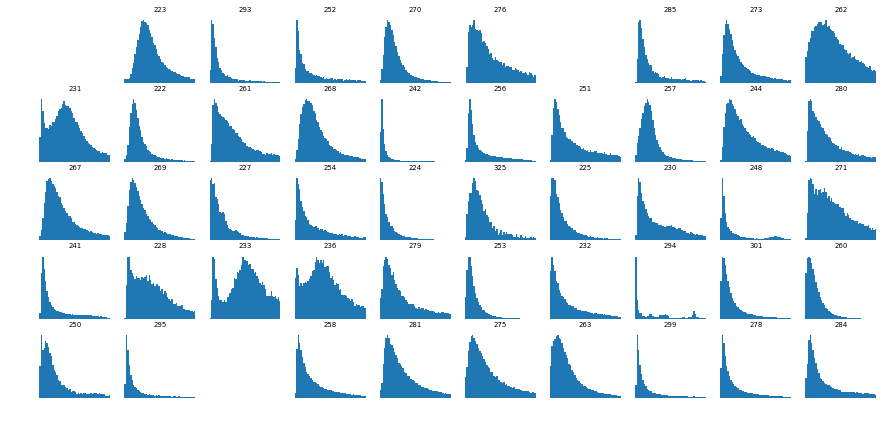

In [82]:
# Get spike times for 50 units with highest SNR and at least 3000 total spikes
unit_list = snr_df_2.unit_id.values[:50]
probe_v1 = 'probeC'
cortical_area = 'VISp'
probe_v1_spikes = data_set.spike_times[probe_v1]

# Figure setup
fig,ax = plt.subplots(5,10,figsize=(15,7),sharex=True)
ax = ax.ravel()

# Plot ISI distribution for each unit
for i,unit in enumerate(unit_list):
        unit_spikes = probe_v1_spikes[unit]
        if len(unit_spikes) > 3000:
            isi = np.diff(unit_spikes)
            ax[i].hist(isi,bins=50,range=(0,0.3))
            ax[i].set_title(str(unit_list[i]),fontsize=7)

plt.xlim(0,0.3)

for i in ax:
    i.axis('off')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Project ideas</h1>
</div>

** 1. Characterize visual stimulus coding by burst spikes**
    * Many cortical cells fire action potential in bursts (ISI < 10 ms).
    * Do burst spikes have similar tuning compared to all spikes?
    * Is bursting stimulus-dependent?
    
** 2. "Excitatory" versus "Inhibitory" responses to natural images.**
    * Examination of raster plots to natural images suggests cells have different response types. Some neurons increase firing rate to images while others are suppressed. Is there a logic to these responses? E.g. are "suppressed" cells inhibited by all stimuli or is suppression tuned? What fraction of cells show increases/decreases in firing? Does unsupervised clustering reveal enhanced versus suppressed response patterns? Do these response modes vary across areas?

** 3. Cell classification using multi-channel waveform, spiking pattern, functional interactions**
    * Extracellular recordings can reveal RS and FS classes. 
    * High-density Neuropixels probes record single cells on multiple channels and this information can be useful for cell classification.
    * Can units be clustered based on spiking pattern ('bursting' vs 'non-bursting')?
    * Can spiking pattern, waveform, and functional interaction features be combined to facilitate unsupervised clustering (e.g. k-means) for identifying cell classes?
    
    
** 4. Explore spike count variability as a function of timescale **
    * Explore how spike count reliability and precision by examining variability on long (100s of ms) versus short (1-10 ms)timescales. 


** 5. Temporal dynamics of stimulus decodability**
    * How fast can stimuli be decoded from spiking populations? What is the timecourse of decodability in different areas and cortical layers?
    
    
** 6. Compare image decoding using ephys vs ophys measurements**
    * Use both EphysObservatory and Ophys BrainObservatory data to compare neural responses estimated with these two modalities. Ephys will likely provide image information on faster timescale. Does Ephys data more information for decoding?
  
** 7. Data visualization**
    * Visualize action potential backpropagation along the Neuropixels probe
    * Visualize spike patterns across shank of Neuropixels probe 
    * Visualize functional interaction network between layers and areas
    * Use dimensionality reduction to visualize spiking population dynamics in lower dimensional space
    
    
** 8. Compare backpropagating action potentials in Allen Institute datasets with ground-truth Neuropixels recordings from rat cortex **
    * A new preprint (biorxiv) study makes simultaneous patch-clamp and Neuropixels recordings from single neurons providing an important ground-truth dataset: https://www.biorxiv.org/content/early/2018/07/23/370080 (Marques-Smith et al.)
    * Compare spatiotemporal action potential properties (e.g action potential backpropagation) measured with Neuropixels from mouse visual cortex and hippocampus (Allen Institute) and ground-truth recordings in rat (Marques-Smith et al.).
    * Github repo for external dataset: https://github.com/kampff-lab/sc.io/tree/master/Paired%20Recordings
    
